<a href="https://colab.research.google.com/github/cyp-ark/semisupervisedlearning/blob/main/pi_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

from keras.utils import np_utils
from keras.datasets import cifar10


In [ ]:
img_input = keras.Input(shape=(32,32,3))
aug_input = layers.GaussianNoise(stddev = 0.15)(img_input)

In [ ]:
x1 = layers.Conv2D(128,(3,3),padding="same")(aug_input)
x1 = layers.LeakyReLU(alpha=0.1)(x1)
x1 = layers.Conv2D(128,(3,3),padding="same")(x1)
x1 = layers.LeakyReLU(alpha=0.1)(x1)
x1 = layers.Conv2D(128,(3,3),padding="same")(x1)
x1 = layers.LeakyReLU(alpha=0.1)(x1)

x1 = layers.MaxPool2D((2,2))(x1)
x1 = layers.Dropout(rate=0.5)(x1)

x1 = layers.Conv2D(256,(3,3),padding="same")(x1)
x1 = layers.LeakyReLU(alpha=0.1)(x1)
x1 = layers.Conv2D(256,(3,3),padding="same")(x1)
x1 = layers.LeakyReLU(alpha=0.1)(x1)
x1 = layers.Conv2D(256,(3,3),padding="same")(x1)
x1 = layers.LeakyReLU(alpha=0.1)(x1)

x1 = layers.MaxPool2D((2,2))(x1)
x1 = layers.Dropout(rate=0.5)(x1)

x1 = layers.Conv2D(512,(3,3),padding="valid")(x1)
x1 = layers.LeakyReLU(alpha=0.1)(x1)
x1 = layers.Conv2D(256,(1,1))(x1)
x1 = layers.LeakyReLU(alpha=0.1)(x1)
x1 = layers.Conv2D(128,(1,1))(x1)
x1 = layers.LeakyReLU(alpha=0.1)(x1)

x1 = layers.GlobalAveragePooling2D()(x1)
output1 = layers.Dense(10, activation = "Softmax", name="z")(x1)

In [ ]:
x2 = layers.Conv2D(128,(3,3),padding="same")(aug_input)
x2 = layers.LeakyReLU(alpha=0.1)(x2)
x2 = layers.Conv2D(128,(3,3),padding="same")(x2)
x2 = layers.LeakyReLU(alpha=0.1)(x2)
x2 = layers.Conv2D(128,(3,3),padding="same")(x2)
x2 = layers.LeakyReLU(alpha=0.1)(x2)

x2 = layers.MaxPool2D((2,2))(x2)
x2 = layers.Dropout(rate=0.5)(x2)

x2 = layers.Conv2D(256,(3,3),padding="same")(x2)
x2 = layers.LeakyReLU(alpha=0.1)(x2)
x2 = layers.Conv2D(256,(3,3),padding="same")(x2)
x2 = layers.LeakyReLU(alpha=0.1)(x2)
x2 = layers.Conv2D(256,(3,3),padding="same")(x2)
x2 = layers.LeakyReLU(alpha=0.1)(x2)

x2 = layers.MaxPool2D((2,2))(x2)
x2 = layers.Dropout(rate=0.5)(x2)

x2 = layers.Conv2D(512,(3,3),padding="valid")(x2)
x2 = layers.LeakyReLU(alpha=0.1)(x2)
x2 = layers.Conv2D(256,(1,1))(x2)
x2 = layers.LeakyReLU(alpha=0.1)(x2)
x2 = layers.Conv2D(128,(1,1))(x2)
x2 = layers.LeakyReLU(alpha=0.1)(x2)

x2 = layers.GlobalAveragePooling2D()(x2)
x2 = layers.Dense(10, activation = "Softmax")(x2)

output2 = layers.subtract([x2,output1],name="z_hat")

In [ ]:
model = keras.Model(inputs=img_input, outputs = [output1, output2])
model.summary()

Model: "model_9"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_4 (InputLayer)           [(None, 32, 32, 3)]  0           []                               
                                                                                                  
 gaussian_noise_11 (GaussianNoi  (None, 32, 32, 3)   0           ['input_4[0][0]']                
 se)                                                                                              
                                                                                                  
 conv2d_110 (Conv2D)            (None, 32, 32, 128)  3584        ['gaussian_noise_11[0][0]']      
                                                                                                  
 conv2d_155 (Conv2D)            (None, 32, 32, 128)  3584        ['gaussian_noise_11[0][0]']

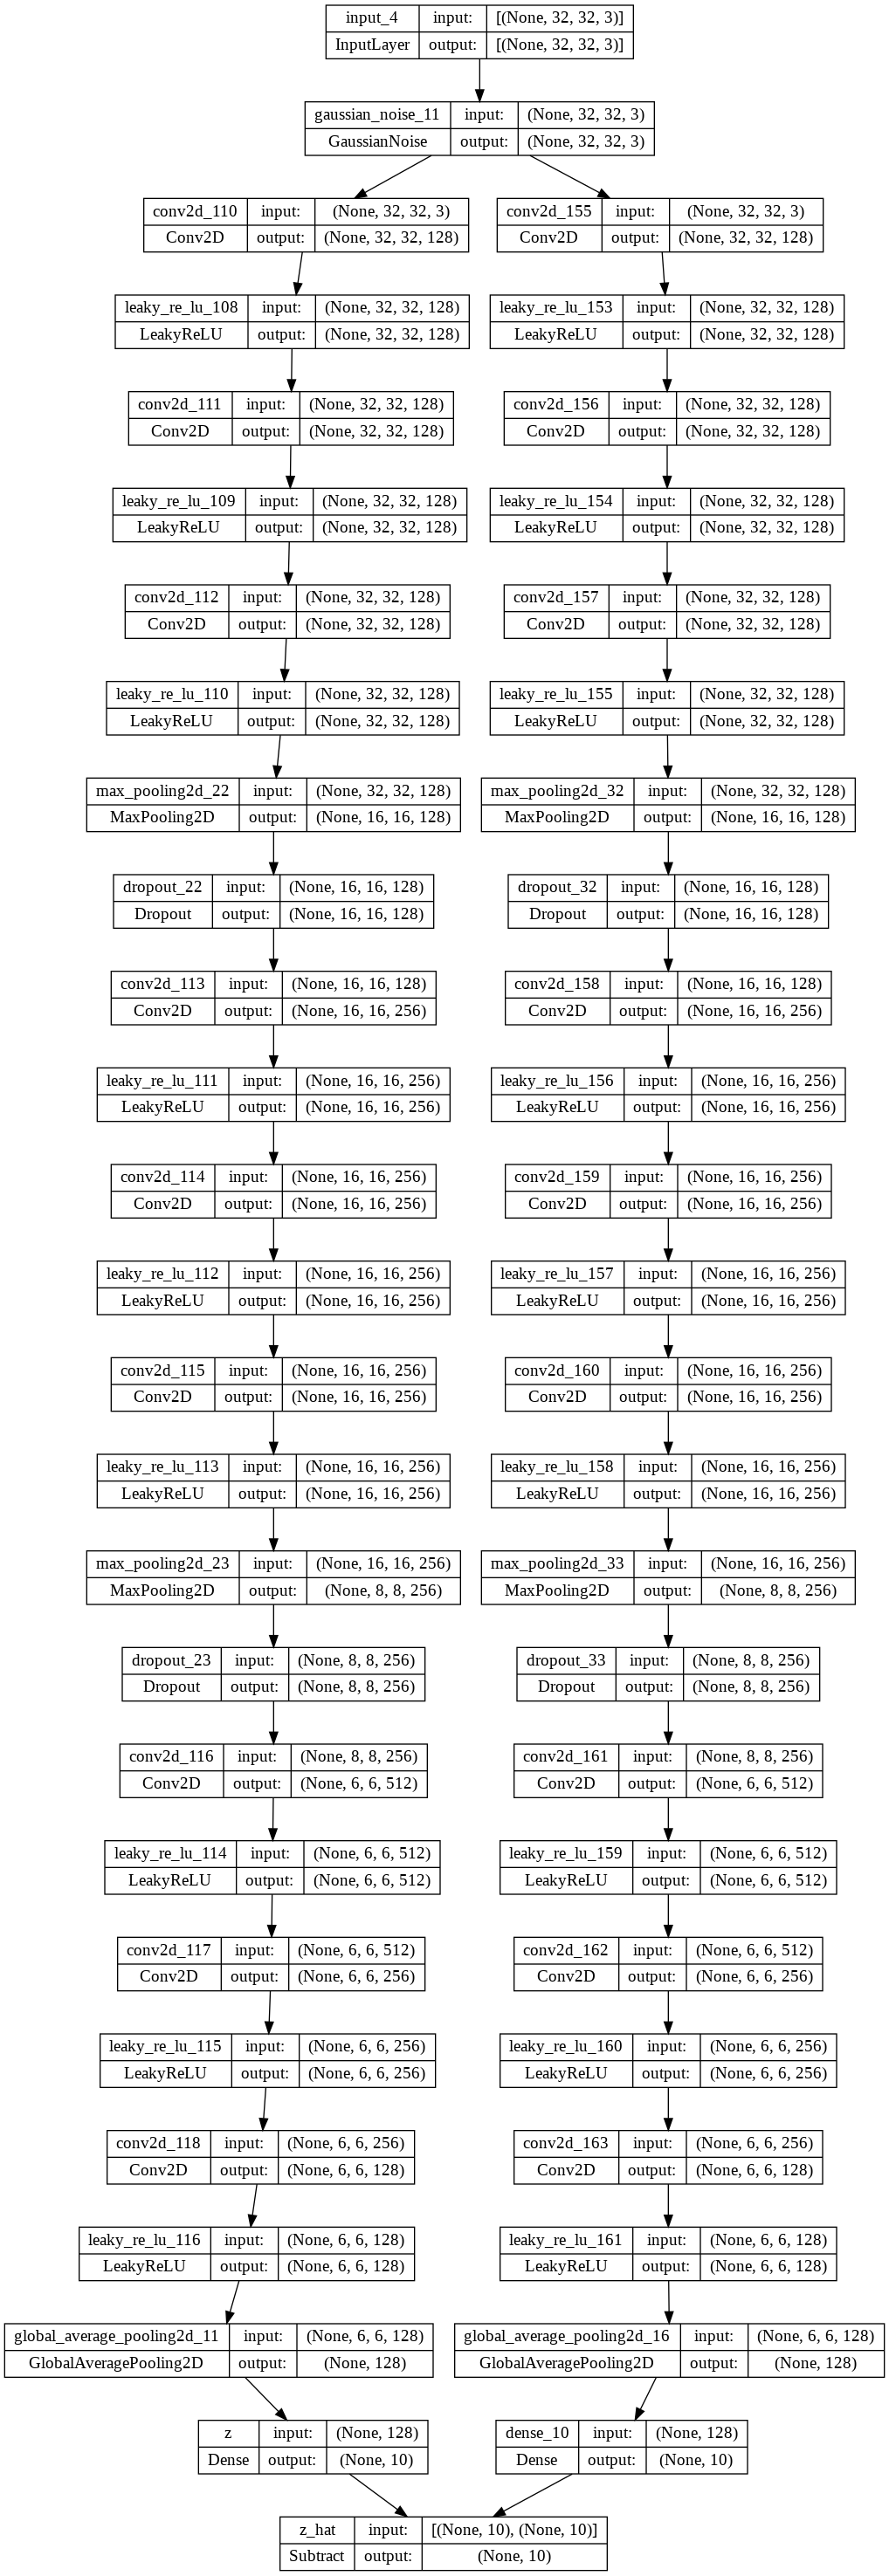

In [ ]:
keras.utils.plot_model(model, "multi_input_and_output_model.png", show_shapes=True)

In [ ]:
from tensorflow.keras import losses
def z_z_hat_mse(y_true,y_pred):
  return K.square(y_pred)

In [ ]:
(X_train, y_train), (X_test,y_test) =cifar10.load_data()

X_train = X_train.astype('float32') / 255
X_test = X_test.astype('float32') / 255

y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)

In [ ]:
model.compile(
    optimizer = keras.optimizers.Adam(learning_rate=0.005),
    loss={"z":keras.losses.CategoricalCrossentropy(from_logits=True),
          "z_hat":z_z_hat_mse},
          loss_weights={"z":0.8,"z_hat":0.2}
)


history = model.fit(X_train, y_train, batch_size=300, epochs=3)

test_scores = model.evaluate(X_test,y_test,verbose=2)
print("Test loss:", test_scores[0])
print("Test accuracy:", test_scores[1])

Epoch 1/3
167/167 [==============================] - 58s 340ms/step - loss: 1.8889 - z_loss: 2.3611 - z_hat_loss: 0.0000e+00
Epoch 2/3
167/167 [==============================] - 58s 345ms/step - loss: 1.8889 - z_loss: 2.3611 - z_hat_loss: 0.0000e+00
Epoch 3/3
167/167 [==============================] - 58s 345ms/step - loss: 1.8889 - z_loss: 2.3611 - z_hat_loss: 0.0000e+00
313/313 - 5s - loss: 1.8889 - z_loss: 2.3611 - z_hat_loss: 0.0000e+00 - 5s/epoch - 17ms/step
Test loss: 1.8889209032058716
Test accuracy: 2.3611416816711426


In [ ]:
xx = model.predict(xa)[1]
print(xx)

1/1 [==============================] - 0s 17ms/step
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


In [ ]:
K.square(xx)

<tf.Tensor: shape=(1, 10), dtype=float32, numpy=array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)>

In [ ]:
xa = X_test[0].reshape(-1,32,32,3)

In [ ]:
xa.shape

(1, 32, 32, 3)

In [ ]:
y_test[0]

array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0.], dtype=float32)